# The file **hiring.csv** contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,


## 2 yr experience, 9 test score, 6 interview score

## 12 yr experience, 10 test score, 10 interview score

In [33]:
predict_one = [2, 9, 6] # years in experience, test score, interview score
predict_two = [12, 10, 10]

---

# Answer
53713.86 and 93747.79

---

## Importing Libraries and Collecting Data

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

sns.set()
plt.style.use('dark_background')

In [3]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
df.columns = ['experience', 'test_score', 'interview_score', 'salary']
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


## Data Preprocessing: Fill NA values

In [11]:
df['experience'] = df['experience'].fillna('zero')
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [12]:
from word2number import w2n
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [13]:
df['test_score'] = df['test_score'].fillna(df['test_score'].median())
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


## Creating and Fitting the Model

### Separating the Data

In [61]:
X = df.drop('salary', axis=1)
y = df['salary']

In [63]:
X

,experience,test_score,interview_score
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,8.0,7
7,11,7.0,8


In [64]:
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary, dtype: int64

### Fitting the Model

In [16]:
reg = linear_model.LinearRegression()

In [65]:
reg.fit( X, y ) # (independent variable , dependent variable)

LinearRegression()

In [66]:
m = reg.coef_
b = reg.intercept_

In [67]:
m

array([2812.95487627, 1845.70596798, 2205.24017467])

In [68]:
b

17737.263464337695

In [73]:
r2 = reg.score(X,y)
r2

0.961678000257796

In [70]:
y_bar = reg.predict(X)
y_bar 

array([52350.0727802 , 45734.35225619, 58312.95487627, 63872.63464338,
       67270.74235808, 61148.47161572, 76069.1411936 , 79241.63027656])

### Visualizing the model

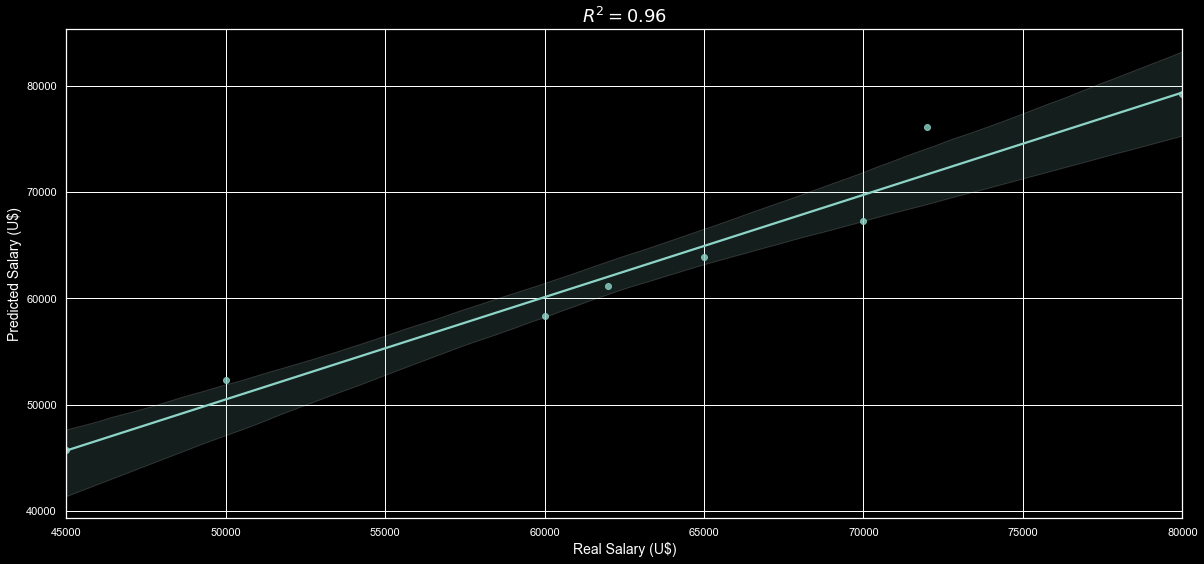

In [80]:
fig, ax = plt.subplots(figsize=(20,9))
ax = sns.regplot(x=y, y=y_bar)
ax.set_xlabel('Real Salary (U$)', fontsize=14)
ax.set_ylabel('Predicted Salary (U$)', fontsize=14)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18);

## Making the Predictions

In [35]:
prediction = pd.DataFrame({'experience:':[predict_one[0], predict_two[0]],
                           'test_score':[predict_one[1], predict_two[1]],
                           'interview_score':[predict_one[2], predict_two[2]]
                          })
prediction

,experience:,test_score,interview_score
0,2,9,6
1,12,10,10


In [55]:
reg.predict( [predict_one] )

array([53205.96797671])

In [56]:
reg.predict( [predict_two] )

array([92002.18340611])

In [59]:
prediction['salary'] = [reg.predict([predict_one])[0], reg.predict([predict_two])[0]]
prediction

,experience:,test_score,interview_score,salary
0,2,9,6,53205.967977
1,12,10,10,92002.183406
